# Notebook supporting feature engineering and eda of training set

In [169]:
import pandas as pd

In [170]:
train_df: pd.DataFrame = pd.read_csv('../data/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Replace text content (string values) with numerical one

- TODO Basement - few features about the same topic, but all will have NA if no basement

In [171]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [172]:
for col in train_df.columns:
    if pd.api.types.is_string_dtype(train_df[col].dtype):
        train_df[col + '_fact'] = pd.factorize(train_df[col])[0]

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_fact,GarageFinish_fact,GarageQual_fact,GarageCond_fact,PavedDrive_fact,PoolQC_fact,Fence_fact,MiscFeature_fact,SaleType_fact,SaleCondition_fact
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,1,0,0,0,-1,-1,-1,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0


#### Put year values into bins

YearBuilt       1872
YearRemodAdd    1950
dtype: int64
YearBuilt       2010
YearRemodAdd    2010
dtype: int64


<AxesSubplot:>

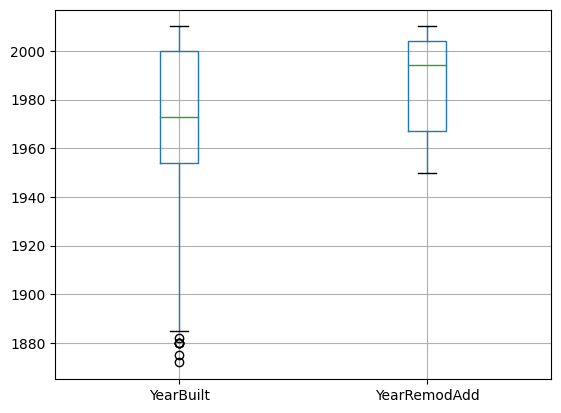

In [173]:
print(train_df[['YearBuilt', 'YearRemodAdd']].min())
print(train_df[['YearBuilt', 'YearRemodAdd']].max())

train_df.boxplot(column=['YearBuilt', 'YearRemodAdd'])

In [174]:
# Arbitrary bin values based on above plot. Could be calculated within deeper analysis

train_df['YearBuilt_bins'] = pd.qcut(train_df['YearBuilt'], q=10, labels=False, precision=0)
train_df['YearRemodAdd_bins'] = pd.qcut(train_df['YearRemodAdd'], q=8, labels=False, precision=0)

train_df[['YearBuilt', 'YearBuilt_bins', 'YearRemodAdd', 'YearRemodAdd_bins']].head()

,YearBuilt,YearBuilt_bins,YearRemodAdd,YearRemodAdd_bins
0,2003,7,2003,5
1,1976,5,1976,2
2,2001,7,2002,5
3,1915,0,1970,2
4,2000,7,2000,4


#### Lot area into bins

LotArea    1300
dtype: int64
LotArea    215245
dtype: int64


<AxesSubplot:>

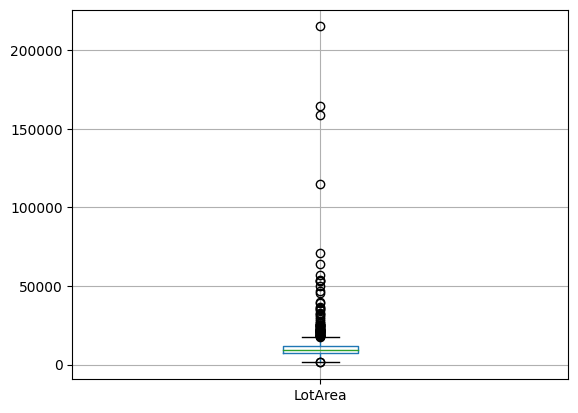

In [175]:
print(train_df[['LotArea']].min())
print(train_df[['LotArea']].max())

train_df.boxplot(column=['LotArea'])

In [176]:
train_df['LotArea_bins'] = pd.qcut(train_df['LotArea'], q=20, labels=False, precision=0)

train_df[['LotArea', 'LotArea_bins']].head()

,LotArea,LotArea_bins
0,8450,6
1,9600,10
2,11250,14
3,9550,10
4,14260,17


## Description of already numeric features

- TODO Quite a lot of outliers, especially on max side
- TODO Values on different scales

In [177]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_fact,PavedDrive_fact,PoolQC_fact,Fence_fact,MiscFeature_fact,SaleType_fact,SaleCondition_fact,YearBuilt_bins,YearRemodAdd_bins,LotArea_bins
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,0.000685,0.102740,-0.989726,-0.667123,-0.956849,0.234932,0.35000,4.421918,3.376712,9.493151
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,0.411453,0.365201,0.158916,0.793316,0.245984,0.804553,0.88787,2.817757,2.221585,5.771460
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.00000,2.000000,1.000000,4.750000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.00000,4.000000,3.000000,9.500000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.00000,7.000000,5.000000,14.250000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,4.000000,2.000000,2.000000,3.000000,3.000000,8.000000,5.00000,9.000000,7.000000,19.000000


## Correlation between features

- There are already high correlation between some features

In [178]:
corr: pd.DataFrame = train_df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_fact,PavedDrive_fact,PoolQC_fact,Fence_fact,MiscFeature_fact,SaleType_fact,SaleCondition_fact,YearBuilt_bins,YearRemodAdd_bins,LotArea_bins
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.008315,0.008921,0.066509,0.005029,-0.014074,-0.016932,-0.017712,-0.004446,-0.011059,-0.005492
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.043787,0.025973,0.010353,-0.080209,-0.016437,0.012874,-0.015047,0.060702,0.007560,-0.348815
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.028846,-0.073334,0.219815,0.037457,0.007872,0.006370,0.072517,0.123288,0.102659,0.614534
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.021387,-0.002964,0.093908,-0.030856,0.089707,-0.013882,0.000199,-0.002666,0.008646,0.490058
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.057696,-0.200702,0.057726,-0.129482,-0.083121,0.063406,0.131870,0.638594,0.552653,0.258423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleType_fact,-0.016932,0.012874,0.006370,-0.013882,0.063406,-0.111267,0.077768,0.031197,0.030321,0.013870,...,-0.048107,-0.021553,-0.002809,-0.027036,0.014543,1.000000,0.232149,0.098041,0.070860,0.016362
SaleCondition_fact,-0.017712,-0.015047,0.072517,0.000199,0.131870,-0.144985,0.149704,0.117656,0.079835,0.027785,...,-0.015666,-0.049674,0.071651,-0.032209,-0.047231,0.232149,1.000000,0.196815,0.188161,0.036783
YearBuilt_bins,-0.004446,0.060702,0.123288,-0.002666,0.638594,-0.373655,0.966261,0.654709,0.311280,0.217949,...,-0.029217,-0.345208,0.020926,-0.210661,-0.083638,0.098041,0.196815,1.000000,0.673144,0.103435
YearRemodAdd_bins,-0.011059,0.007560,0.102659,0.008646,0.552653,0.040634,0.596791,0.957067,0.180016,0.108697,...,-0.060269,-0.193041,0.000678,-0.154813,-0.092477,0.070860,0.188161,0.673144,1.000000,0.080118


In [179]:
for col in train_df.columns:
    if col in corr:
        col_sorted = corr[col].sort_values(ascending=False)
        print(col_sorted[1])

0.06650900950191323
0.7708396619425061
0.6145343341427186
0.49005802714485247
0.7909816005838053
0.22791158639694706
0.9662605641251347
0.9570671331398399
0.47749304709571444
0.6492117535742649
0.7351647961785289
0.4153596051815893
0.8195299750050339
0.8195299750050339
0.6875010641666033
0.2216633481235792
0.8254893743088425
0.6492117535742649
0.1190481678808047
0.6300116462511148
0.6097073002717436
0.676619935742649
0.2817210402648814
0.8254893743088425
0.7243931381986498
0.8543245226025343
0.882475414281462
0.882475414281462
0.32441344456812926
0.33022396171200064
0.23451238644859992
0.07002922773085365
0.18453026951684842
0.9384016221034005
0.5478908301970202
0.07125488475868938
0.06808527703896494
0.7909816005838053
0.39926967855640855
0.19713093862382264
0.39926967855640855
0.3487643352474657
0.5072032466851077
0.10814052632343978
0.3080734084680183
0.5072032466851077
0.18419776547817274
0.18917211091677272
0.21312282128545232
0.7708396619425061
0.2216633481235792
0.50973251883017

# Nulls and uniqueness

- 17 columns with null values
- Features differ a lot in number of unique values
- TODO Strategy to fill missing values needed

In [180]:
train_df.isnull().sum()

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage           259
LotArea                 0
                     ... 
SaleType_fact           0
SaleCondition_fact      0
YearBuilt_bins          0
YearRemodAdd_bins       0
LotArea_bins            0
Length: 127, dtype: int64

In [181]:
train_df.nunique()

Id                    1460
MSSubClass              15
MSZoning                 5
LotFrontage            110
LotArea               1073
                      ... 
SaleType_fact            9
SaleCondition_fact       6
YearBuilt_bins          10
YearRemodAdd_bins        8
LotArea_bins            20
Length: 127, dtype: int64